1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):

Exemplo de como fazer a importação do dataset usando o sklearnfrom sklearn import datasets

iris = datasets.load_iris()

Responda:
a. Faça uma análise inicial sobre esse dataset


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report


In [2]:
# Carregar o dataset Iris
iris = load_iris()

# Verificar o tipo do dataset
print("Tipo do dataset:", type(iris))

Tipo do dataset: <class 'sklearn.utils._bunch.Bunch'>


In [3]:
# Verificar as chaves (keys) disponíveis no dataset
print("Chaves disponíveis no dataset:", iris.keys())

Chaves disponíveis no dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# Exibir as descrições e informações gerais sobre o dataset
print("Descrição do dataset:")
print(iris.DESCR)

Descrição do dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for 

In [5]:
# Converter os dados em um DataFrame do pandas para uma melhor visualização
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adicionar a coluna target ao DataFrame

In [8]:
#carregando a base de dados contida na biblioteca seaborn
base_dados = sns.load_dataset('iris')
# Visualizando a base de dados
base_dados.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.


In [9]:
# Mapear os valores numéricos de target para nomes de espécies
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

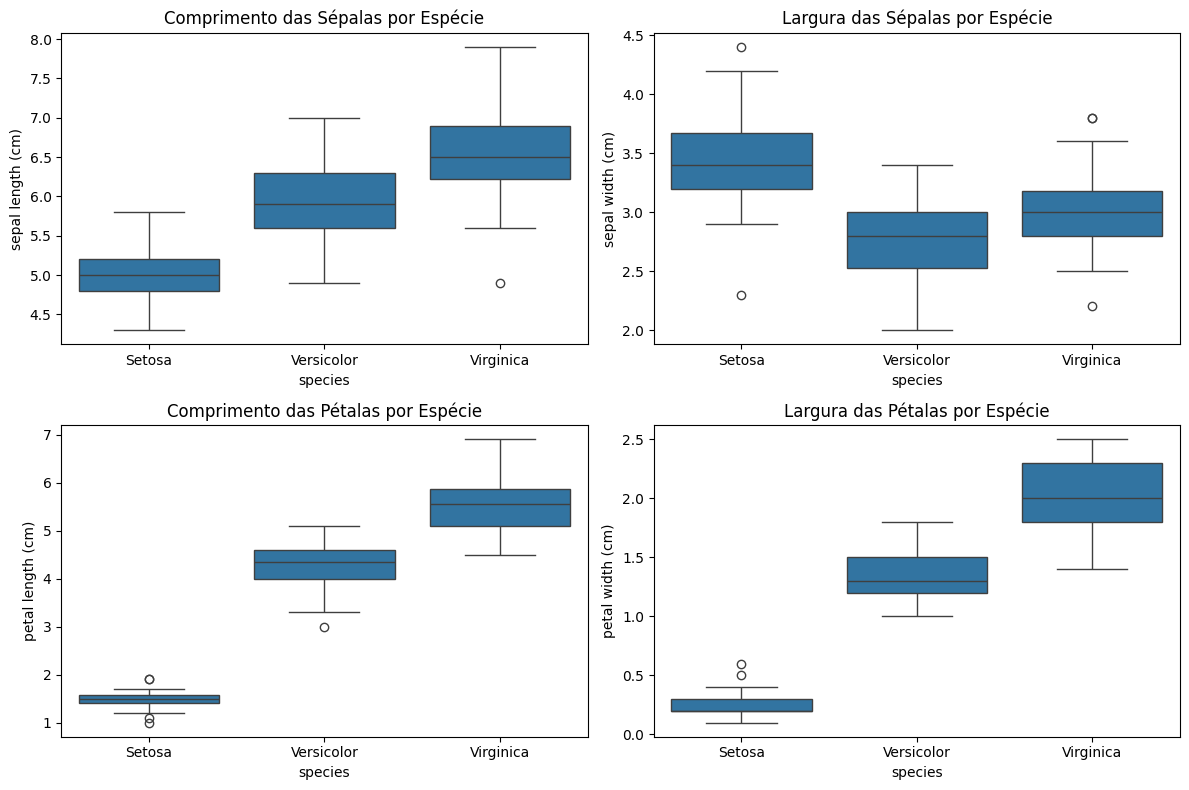

In [10]:
# Plotar boxplots para cada atributo separados por espécie
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Comprimento das Sépalas por Espécie')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.title('Largura das Sépalas por Espécie')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento das Pétalas por Espécie')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura das Pétalas por Espécie')

plt.tight_layout()
plt.show()


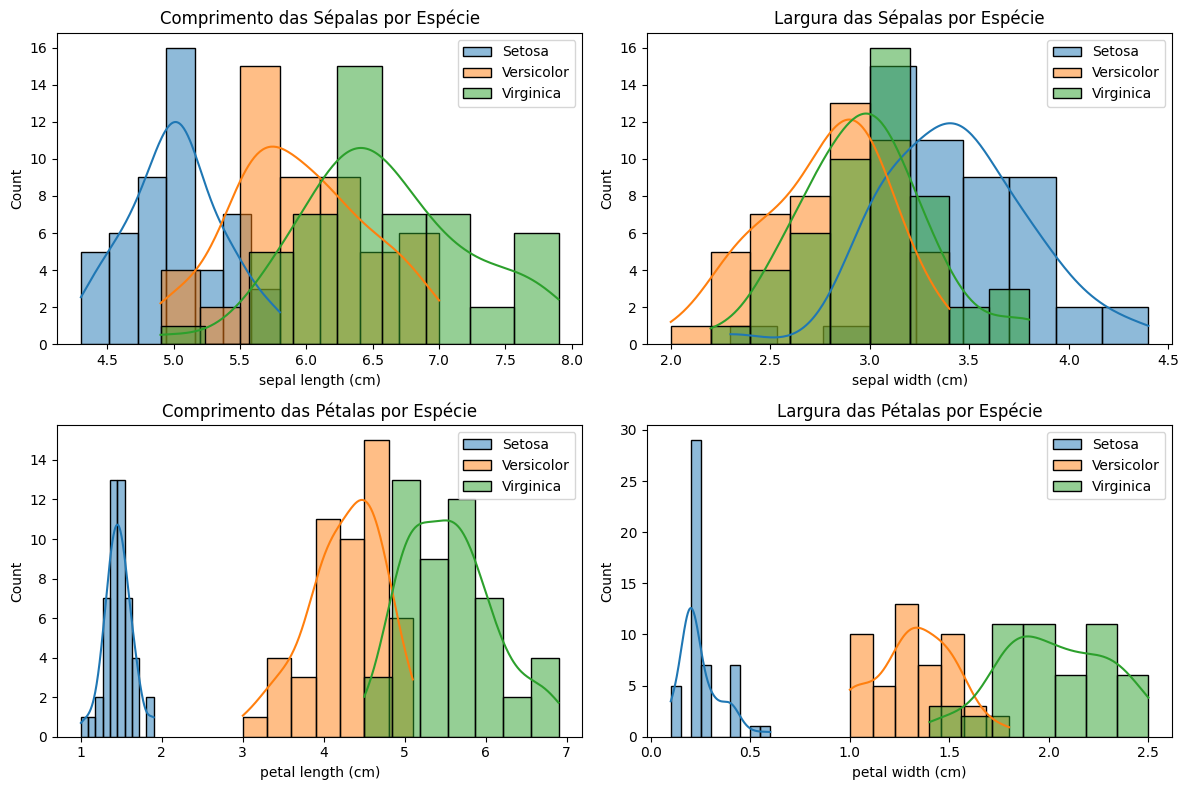

In [11]:
# Plotar histogramas para cada atributo separados por espécie
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for species in df['species'].unique():
    sns.histplot(df[df['species'] == species]['sepal length (cm)'], label=species, kde=True)
plt.legend()
plt.title('Comprimento das Sépalas por Espécie')

plt.subplot(2, 2, 2)
for species in df['species'].unique():
    sns.histplot(df[df['species'] == species]['sepal width (cm)'], label=species, kde=True)
plt.legend()
plt.title('Largura das Sépalas por Espécie')

plt.subplot(2, 2, 3)
for species in df['species'].unique():
    sns.histplot(df[df['species'] == species]['petal length (cm)'], label=species, kde=True)
plt.legend()
plt.title('Comprimento das Pétalas por Espécie')

plt.subplot(2, 2, 4)
for species in df['species'].unique():
    sns.histplot(df[df['species'] == species]['petal width (cm)'], label=species, kde=True)
plt.legend()
plt.title('Largura das Pétalas por Espécie')

plt.tight_layout()
plt.show()


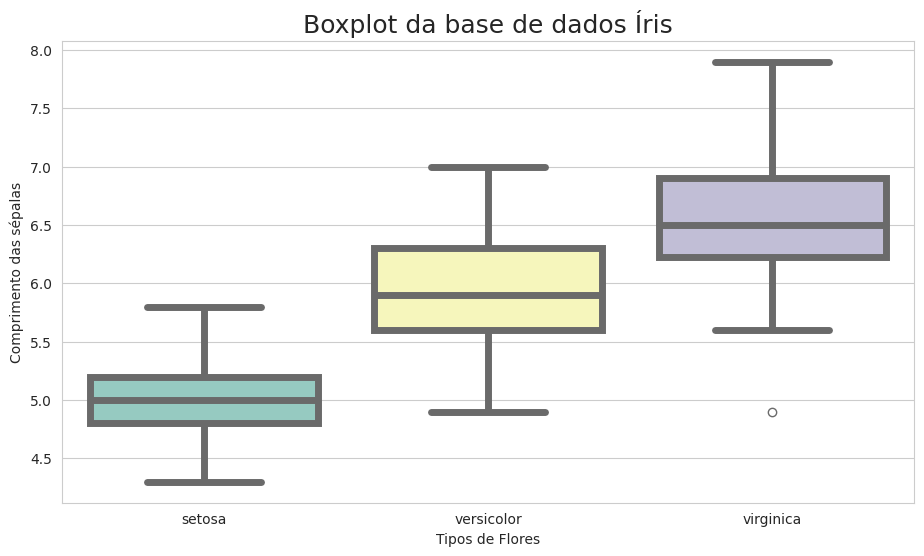

In [12]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "species", y ="sepal_length",data = base_dados,
                  hue = "species",linewidth=5, palette = "Set3")

# Adicionando Título ao gráfico
plt.title("Boxplot da base de dados Íris", loc="center", fontsize=18)
plt.xlabel("Tipos de Flores")
plt.ylabel("Comprimento das sépalas")

plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?


Sim, é possível usar os gráficos de boxplot e histogramas para ter uma ideia inicial de quais propriedades (comprimento e largura das sépalas e pétalas) são suficientes para diferenciar entre as diferentes espécies no dataset Iris.

### Análise dos Gráficos:

#### Boxplots:
- Os boxplots nos ajudam a visualizar a distribuição dos dados de cada atributo (comprimento e largura das sépalas e pétalas) para cada espécie de íris (Setosa, Versicolor, Virginica).
- Eles mostram a mediana (linha no meio do retângulo), os quartis (extremidades do retângulo), e os possíveis outliers (pontos fora das barras).

#### Histogramas:
- Os histogramas nos mostram a distribuição de cada atributo para cada espécie, com a curva KDE (Kernel Density Estimate) fornecendo uma estimativa suave da densidade de probabilidade.

### Observações:

1. **Sepal Length (Comprimento das Sépalas)**:
   - No boxplot, as três espécies apresentam uma sobreposição significativa nos valores de comprimento das sépalas. No entanto, há uma tendência de que a espécie Setosa tenha geralmente menor comprimento de sépalas em comparação com as outras duas espécies.

2. **Sepal Width (Largura das Sépalas)**:
   - Existe uma considerável sobreposição entre as espécies no boxplot de largura das sépalas. No entanto, a espécie Setosa parece ter uma tendência a ter sépalas mais largas em comparação com Versicolor e Virginica.

3. **Petal Length (Comprimento das Pétalas)**:
   - O boxplot mostra uma clara distinção entre as espécies, especialmente entre Setosa e as outras duas espécies. Setosa geralmente tem comprimentos de pétalas muito menores do que Versicolor e Virginica, que têm uma sobreposição considerável entre si.

4. **Petal Width (Largura das Pétalas)**:
   - Assim como o comprimento das pétalas, a largura das pétalas também mostra uma distinção clara entre as espécies. Setosa tem pétalas significativamente mais estreitas do que as outras duas espécies, que têm uma sobreposição mais notável entre si.

### Conclusão:

- **Comprimento e largura das pétalas** (Petal Length e Petal Width) parecem ser propriedades que, só de olhar para os gráficos de boxplot e histogramas, são suficientes para diferenciar bem as três espécies de íris.
- Esses atributos mostram uma separação mais clara entre as espécies, com menos sobreposição em comparação com as sépalas.

Portanto, baseado na análise visual dos gráficos apresentados, o comprimento e largura das pétalas parecem ser as propriedades mais promissoras para diferenciar entre as diferentes espécies de íris no dataset Iris.

d. Aplique a regressão logística para avaliar o modelo de classificação. 


In [14]:
# Converter os dados em um DataFrame do pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adicionar a coluna target ao DataFrame

# Definir variáveis independentes (features) e variável dependente (target)
X = df.drop('target', axis=1)
y = df['target']

# Dividir os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis independentes (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Criar uma instância do modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)



e. Calcule a acurácia, precisão e recall.


In [19]:
# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Calcular precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão do modelo:", precision)

# Calcular recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall do modelo:", recall)

# Imprimir o relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia do modelo: 1.0
Precisão do modelo: 1.0
Recall do modelo: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



f. Plote a matriz de confusao com matplotlib ou seaborn



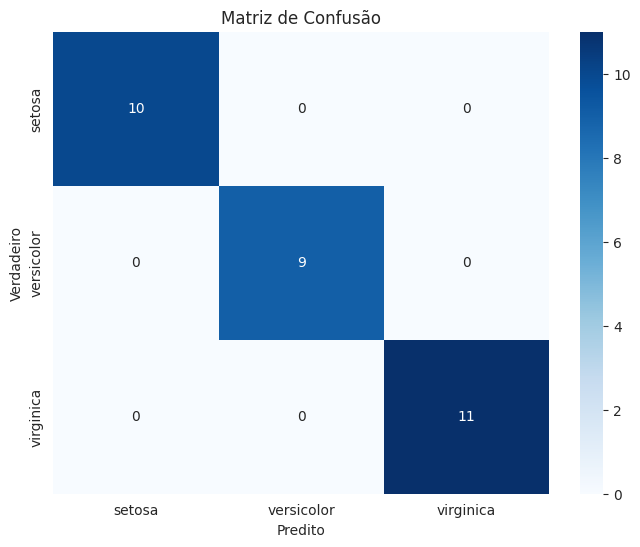

In [20]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a importação do dataset usando o sklearn:

from sklearn.datasets import load_digits
digits = load_digits()

Responda:


a. Faça uma análise inicial sobre esse dataset


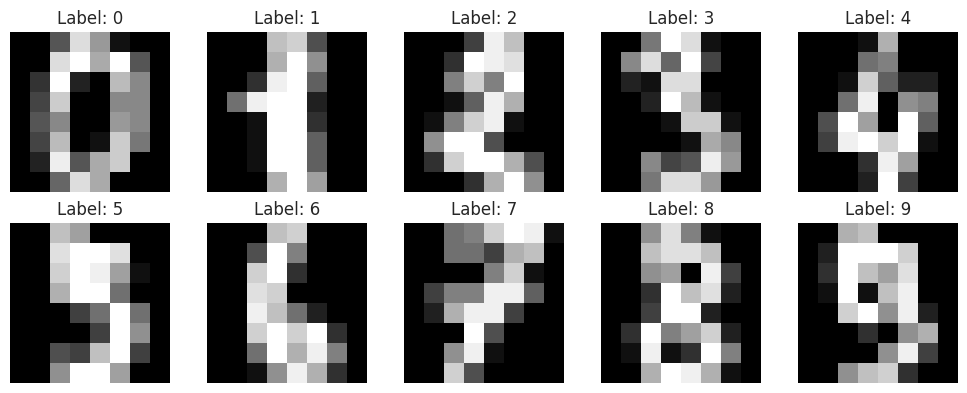

In [22]:
# Carregar o dataset
digits = load_digits()

# Visualizar algumas amostras
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


i. Quantos dados possui?


In [23]:
# Verificar quantas amostras existem
num_samples = len(digits.data)
print("Número de amostras no dataset load_digits:", num_samples)

Número de amostras no dataset load_digits: 1797


ii. Existem dados nulos? Se sim quantos?


In [26]:
# Verificar se existem valores nulos
num_null_values = np.isnan(digits.data).sum()

print("Número de valores nulos no dataset load_digits:", num_null_values)

Número de valores nulos no dataset load_digits: 0


iii. Todos são dados numéricos ou existem colunas com dados categóricos?


In [27]:
# Verificar o tipo de dados
print("Tipo de dados:", type(digits.data))  # Deve imprimir <class 'numpy.ndarray'>

# Verificar o formato dos dados
print("Formato dos dados:", digits.data.shape)  # Deve imprimir (1797, 64)

Tipo de dados: <class 'numpy.ndarray'>
Formato dos dados: (1797, 64)


b. Aplique a regressão logística para avaliar o modelo de classificação.


In [28]:
# Separar variáveis independentes (features) e variável dependente (target)
X = digits.data
y = digits.target

# Dividir os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis independentes (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Acurácia do modelo: 0.9722222222222222


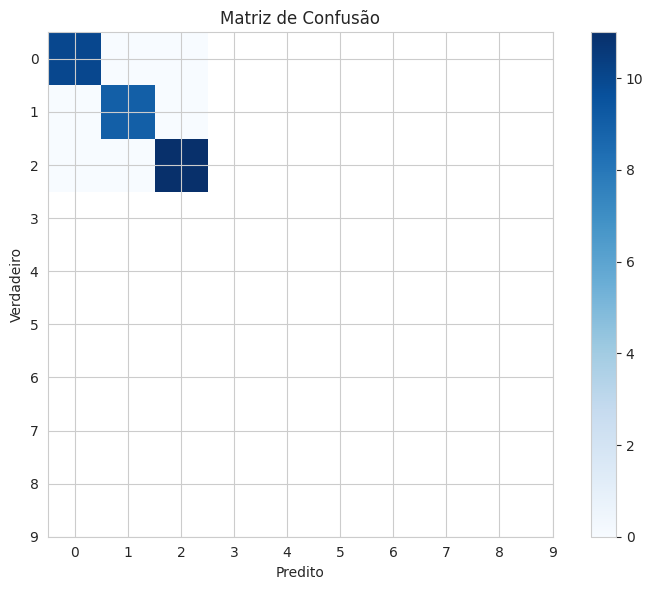


Relatório de Classificação:


TypeError: object of type 'numpy.int64' has no len()

In [29]:
# Criar uma instância do modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=digits.target_names))


c. Calcule a acurácia, precisão e recall.


In [30]:
# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Calcular precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão do modelo:", precision)

# Calcular recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall do modelo:", recall)

Acurácia do modelo: 0.9722222222222222
Precisão do modelo: 0.9725212596953555
Recall do modelo: 0.9722222222222222


d. Plote a matriz de confusão com matplotlib ou seaborn


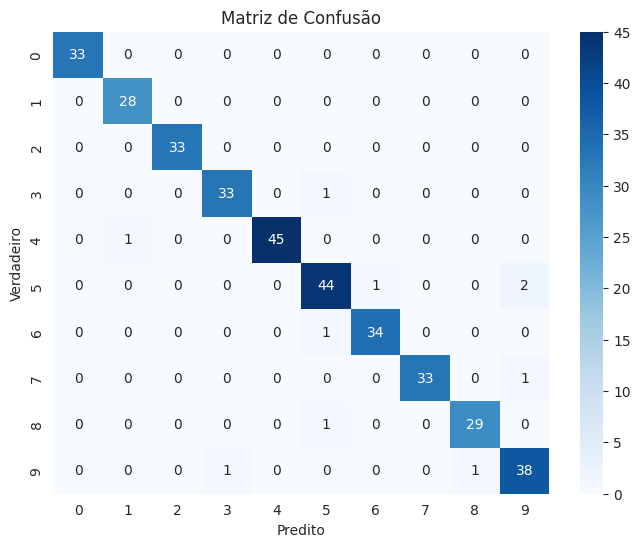

In [31]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.


Acurácia do modelo: 0.9722222222222222


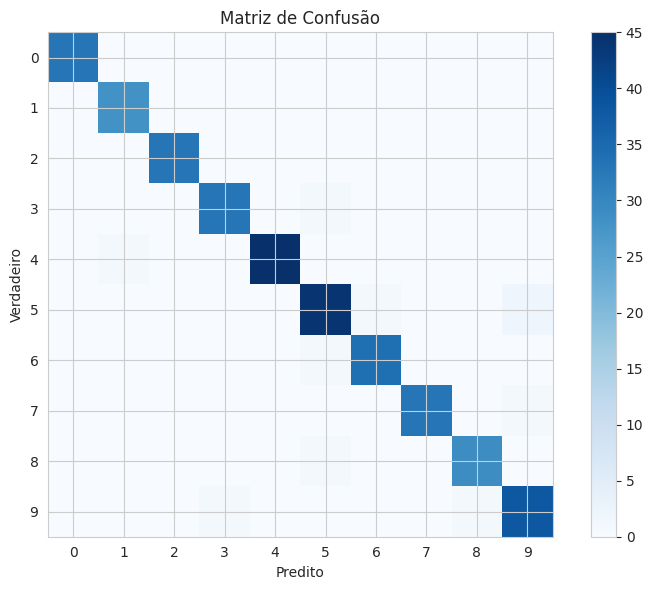


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [32]:
# Criar uma instância do modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in digits.target_names]))


f. Calcule a acurácia, precisão e recall.


In [33]:
# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Calcular precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão do modelo:", precision)

# Calcular recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall do modelo:", recall)

Acurácia do modelo: 0.9722222222222222
Precisão do modelo: 0.9725212596953555
Recall do modelo: 0.9722222222222222


g. Plote a matriz de confusao com matplotlib ou seaborn

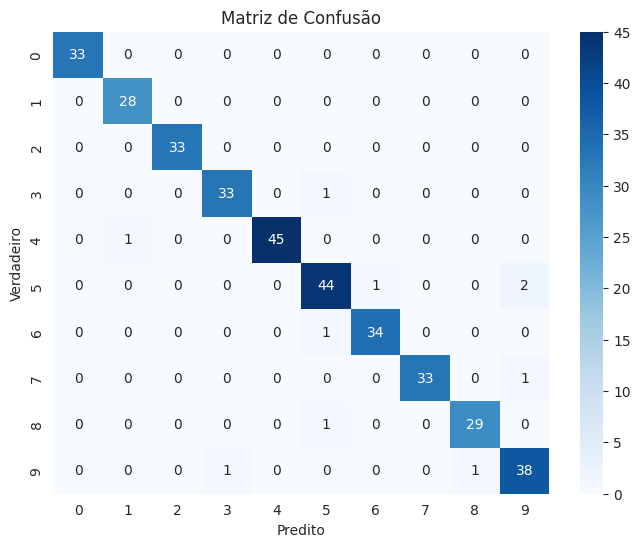

In [34]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()